# Investigating a Dataset 

## Gapmider World 
This data deals with the information about how people live their lives in different countries, tracked across the years on a number of different indicators. The indicators used are below mentioned.  The investigation has been done for **South Asian region**

 

## To be explored
<ul>
<li> <a href='#q1'>Which country had the highest 𝐶𝑜2 emission in 1990? </a></li>
<li> <a href='#q2'>Which country had the less fertility (Babies per woman) in 1990?</a></li>
<li> <a href='#q3'>Which country had the highest population growth from 1990 to 2010?</a></li>
<li> <a href='#q4'>For each South Asian country in 2010, what percentage of people had internet access? Sort the chart with high internet access to low</a></li>
<li> <a href='#q5'>Compare the trend in inflation between India & Sri Lanka between 1980 to 2022 and analyze which country had stability in their inflation.</a></li>
<li> <a href='#q6'>How is income boosted with respect to the inflation rate from the years 1990 - 2010?</a></li>
<li> <a href='#q7'> How is the life expectancy (average number of years a child would live) over two decades? Which country has increased its life expectancy?</a></li>
<li> <a href='#q8'>How are life expectancy and morality correlated?</a></li>
</ul>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Data Wrangling

### Loading Dataset

In [2]:
#Filtering Parameter
columns = ["country", "1990", "2010"]
country = '["Afghanistan", "Bangladesh", "Bhutan", "India", "Iran", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]'
South_Asian_country = 'country in '+country

## Loading dataset
Co2 = pd.read_csv('./Data/co2_emissions_tonnes_per_person.csv', usecols= columns)
fertility = pd.read_csv('./Data/children_per_woman_total_fertility.csv', usecols= columns)
income = pd.read_csv('./Data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv', usecols = columns)
life_expectancy = pd.read_csv('./Data/life_expectancy_years.csv', usecols= columns)
population = pd.read_csv('./Data/population_total.csv', usecols= columns)
internet_users = pd.read_csv('./Data/internet_users.csv', usecols= columns)
non_internet_users = pd.read_csv('./Data/non_net_users_prc.csv', usecols= columns)
inflation = pd.read_csv('./Data/inflation_annual_percent.csv', usecols = columns)


Co2 = Co2.query(South_Asian_country)
Co2.rename(columns = lambda x: 'Co2_'+x, inplace = True)
Co2.rename(columns={'Co2_country': 'country'}, inplace = True)
Co2

,country,Co2_1990,Co2_2010
0,Afghanistan,0.2100,0.290
15,Bangladesh,0.1370,0.366
26,Bhutan,0.2420,0.678
78,India,0.7070,1.380
80,Iran,3.7200,7.650
102,Sri Lanka,0.2210,0.645
110,Maldives,0.7720,2.560
130,Nepal,0.0406,0.181
134,Pakistan,0.6310,0.925



## Renaming the column & Merging the data

In [3]:
df = Co2 # Initalizing dataframe

#Dataset & Renaming params
datasets = [fertility, income, life_expectancy, population, internet_users, non_internet_users,inflation]
renaming = ["fertility", "income", "life_expectancy", "population", "internet_users", "non_internet_users", "inflation"]

for i,dataset in enumerate(datasets):
    dataset.rename(columns = lambda x: renaming[i]+'_'+x, inplace = True)
    index_col = renaming[i]+'_country'
    dataset.rename(columns={index_col: 'country'}, inplace = True)
    df = pd.merge(df,dataset, on = 'country')
    
df

,country,Co2_1990,Co2_2010,fertility_1990,fertility_2010,income_1990,income_2010,life_expectancy_1990,life_expectancy_2010,population_1990,population_2010,internet_users_1990,internet_users_2010,non_internet_users_1990,non_internet_users_2010,inflation_1990,inflation_2010
0,Afghanistan,0.2100,0.290,7.47,5.82,1120,1960,53.8,60.5,12.4M,29.2M,0.0,4.00,100.0,96.0,NaN,3.81
1,Bangladesh,0.1370,0.366,4.55,2.28,1520,2880,58.2,70.0,103M,148M,0.0,3.70,100.0,96.3,6.53,7.14
2,Bhutan,0.2420,0.678,5.64,2.38,2880,8190,60.3,71.0,531k,686k,0.0,13.60,100.0,86.4,6.21,5.85
3,India,0.7070,1.380,4.05,2.60,1810,4240,59.6,67.3,873M,1.23B,0.0,7.50,100.0,92.5,10.7,10.5
4,Iran,3.7200,7.650,4.82,1.77,8630,13.8k,66.7,75.5,56.4M,73.8M,0.0,15.90,100.0,84.1,22.5,15.9
5,Sri Lanka,0.2210,0.645,2.48,2.20,3880,9130,69.6,74.0,17.3M,20.3M,0.0,NaN,100.0,88.0,20.1,22.8
6,Maldives,0.7720,2.560,5.99,2.23,8800,16.3k,65.5,77.8,223k,366k,0.0,26.50,100.0,73.5,NaN,2.88
7,Nepal,0.0406,0.181,5.17,2.61,1620,2700,58.3,69.0,18.9M,27M,0.0,7.93,100.0,92.1,10.7,15.1
8,Pakistan,0.6310,0.925,6.02,3.86,2920,3910,61.0,63.3,108M,179M,0.0,8.00,100.0,92.0,6.45,10.9


## Handling Data (Missing & Datatype)

In [4]:
# Missing Values
df.isna().sum()

country                    0
Co2_1990                   0
Co2_2010                   0
fertility_1990             0
fertility_2010             0
income_1990                0
income_2010                0
life_expectancy_1990       0
life_expectancy_2010       0
population_1990            0
population_2010            0
internet_users_1990        0
internet_users_2010        1
non_internet_users_1990    0
non_internet_users_2010    0
inflation_1990             2
inflation_2010             0
dtype: int64

In [5]:
# Replacing NULL values with 0
df = df.replace(np.nan, 0)

df.isna().sum()

country                    0
Co2_1990                   0
Co2_2010                   0
fertility_1990             0
fertility_2010             0
income_1990                0
income_2010                0
life_expectancy_1990       0
life_expectancy_2010       0
population_1990            0
population_2010            0
internet_users_1990        0
internet_users_2010        0
non_internet_users_1990    0
non_internet_users_2010    0
inflation_1990             0
inflation_2010             0
dtype: int64

## Mapping values for Income, Pcopulation & Cellphone

In [6]:
# Column data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  9 non-null      object 
 1   Co2_1990                 9 non-null      float64
 2   Co2_2010                 9 non-null      float64
 3   fertility_1990           9 non-null      float64
 4   fertility_2010           9 non-null      float64
 5   income_1990              9 non-null      object 
 6   income_2010              9 non-null      object 
 7   life_expectancy_1990     9 non-null      float64
 8   life_expectancy_2010     9 non-null      float64
 9   population_1990          9 non-null      object 
 10  population_2010          9 non-null      object 
 11  internet_users_1990      9 non-null      float64
 12  internet_users_2010      9 non-null      float64
 13  non_internet_users_1990  9 non-null      float64
 14  non_internet_users_2010  9 non

In [7]:
# Columns to map 
mapping = df.iloc[:,np.r_[6,9:11]].columns

df.iloc[:,np.r_[6,9:11]]

,income_2010,population_1990,population_2010
0,1960,12.4M,29.2M
1,2880,103M,148M
2,8190,531k,686k
3,4240,873M,1.23B
4,13.8k,56.4M,73.8M
5,9130,17.3M,20.3M
6,16.3k,223k,366k
7,2700,18.9M,27M
8,3910,108M,179M


In [8]:
# Stripping K, M and 
for col in mapping:
    df[col]= df[col].map(lambda x : int(float(x[:-1])*10**3) if 'k' in x else 
                                                      int(float(x[:-1])*10**6) if 'M' in x else 
                                                      int(float(x[:-1])*10**9) if 'B' in x else float(x*1))


In [9]:
df.iloc[:,np.r_[6,9:11]]

,income_2010,population_1990,population_2010
0,1960.0,12400000,29200000
1,2880.0,103000000,148000000
2,8190.0,531000,686000
3,4240.0,873000000,1230000000
4,13800.0,56400000,73800000
5,9130.0,17300000,20300000
6,16300.0,223000,366000
7,2700.0,18900000,27000000
8,3910.0,108000000,179000000


In [10]:
# Handling Datatype
df['income_1990'] = df['income_1990'].astype(int)
df['fertility_1990'] = df['fertility_1990'].astype(int)
df['fertility_2010'] = df['fertility_2010'].astype(int)
df['inflation_1990'] = df['inflation_1990'].astype(float)
df['inflation_2010'] = df['inflation_2010'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  9 non-null      object 
 1   Co2_1990                 9 non-null      float64
 2   Co2_2010                 9 non-null      float64
 3   fertility_1990           9 non-null      int64  
 4   fertility_2010           9 non-null      int64  
 5   income_1990              9 non-null      int64  
 6   income_2010              9 non-null      float64
 7   life_expectancy_1990     9 non-null      float64
 8   life_expectancy_2010     9 non-null      float64
 9   population_1990          9 non-null      int64  
 10  population_2010          9 non-null      int64  
 11  internet_users_1990      9 non-null      float64
 12  internet_users_2010      9 non-null      float64
 13  non_internet_users_1990  9 non-null      float64
 14  non_internet_users_2010  9 non

In [11]:
df.describe()

,Co2_1990,Co2_2010,fertility_1990,fertility_2010,income_1990,income_2010,life_expectancy_1990,life_expectancy_2010,population_1990,population_2010,internet_users_1990,internet_users_2010,non_internet_users_1990,non_internet_users_2010,inflation_1990,inflation_2010
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000e+00,9.0,9.000000,9.0,9.000000,9.000000,9.000000
mean,0.742289,1.630556,4.666667,2.333333,3686.666667,7012.222222,61.444444,69.822222,1.321949e+08,1.898169e+08,0.0,9.681111,100.0,88.988889,9.243333,10.542222
std,1.148117,2.372611,1.414214,1.118034,2977.704653,5204.725684,4.928770,5.603967,2.808723e+08,3.952866e+08,0.0,7.979111,0.0,7.116608,7.850912,6.495061
min,0.040600,0.181000,2.000000,1.000000,1120.000000,1960.000000,53.800000,60.500000,2.230000e+05,3.660000e+05,0.0,0.000000,100.0,73.500000,0.000000,2.880000
25%,0.210000,0.366000,4.000000,2.000000,1620.000000,2880.000000,58.300000,67.300000,1.240000e+07,2.030000e+07,0.0,4.000000,100.0,86.400000,6.210000,5.850000
50%,0.242000,0.678000,5.000000,2.000000,2880.000000,4240.000000,60.300000,70.000000,1.890000e+07,2.920000e+07,0.0,7.930000,100.0,92.000000,6.530000,10.500000
75%,0.707000,1.380000,5.000000,2.000000,3880.000000,9130.000000,65.500000,74.000000,1.030000e+08,1.480000e+08,0.0,13.600000,100.0,92.500000,10.700000,15.100000
max,3.720000,7.650000,7.000000,5.000000,8800.000000,16300.000000,69.600000,77.800000,8.730000e+08,1.230000e+09,0.0,26.500000,100.0,96.300000,22.500000,22.800000


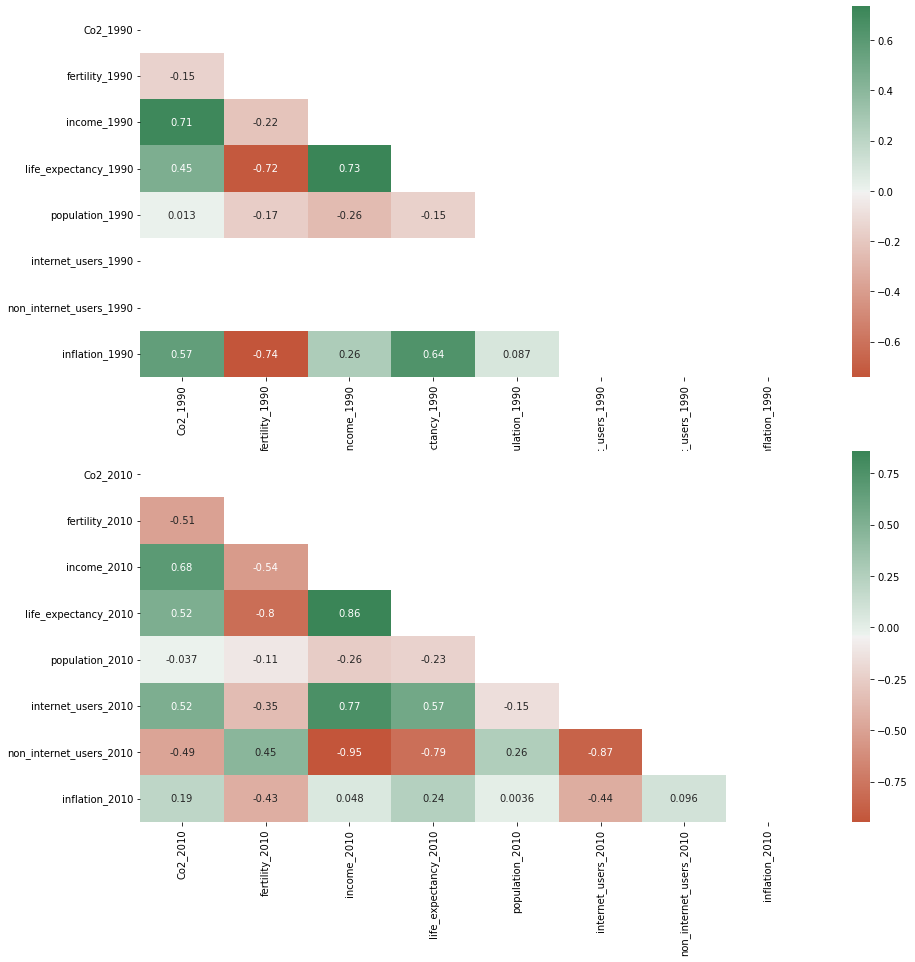

In [12]:
# Yearly df
df_19 = df.filter(like='_1990')
df_20 = df.filter(like='_2010')

# Mask upper triangle & color
mask = np.triu(np.ones_like(df_19.corr(), dtype=bool))
cmap = sns.diverging_palette(20, 500, as_cmap=True)

# Correlation plot
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.heatmap(df_19.corr(), annot= True, mask=mask, cmap= cmap, ax=ax[0], )
sns.heatmap(df_20.corr(), annot= True, mask=mask, cmap= cmap, ax= ax[1])
plt.show()


## Conclusion

In [13]:
# setting up color for max / min value
def set_custom_palette(series, highlight_color = 'turquoise', other_color = 'lightgrey', highlight = 'Max'):
    
    if highlight == 'Max':
        val = series.max()
    if highlight == 'Min':
        val = series.min()
    pal = []
    for item in series:
        if item == val:
            pal.append(highlight_color)
        else:
            pal.append(other_color)
    return pal
 
# Barchart
def barplot(x , y, color = '#79DAE8', orient = None, order = None, palette = None, xlabel = None, ylabel = None, title = None):
    fig, ax = plt.subplots(figsize = (12,8))
    ax = sns.barplot(x=x, y = y,  color = color, order=order,palette = palette, orient = orient)
    ax.bar_label(ax.containers[0])
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    if title is not None:
        plt.title(title)
    sns.despine(bottom = True, left = True)
    plt.show()
    

    

<a id="q1"></a>
### Country with the highest $𝐶𝑜_2$ emission in 1990
 + **Iran** had the **highest** Carbon emission of **3.72 metric tons** in the year 1990, followed by Maldives and India
 + Even though Iran's population is less than India's, the $𝐶o_2$ emission is much higher. So, Iran must try reducing its carbon footprints in the upcoming years

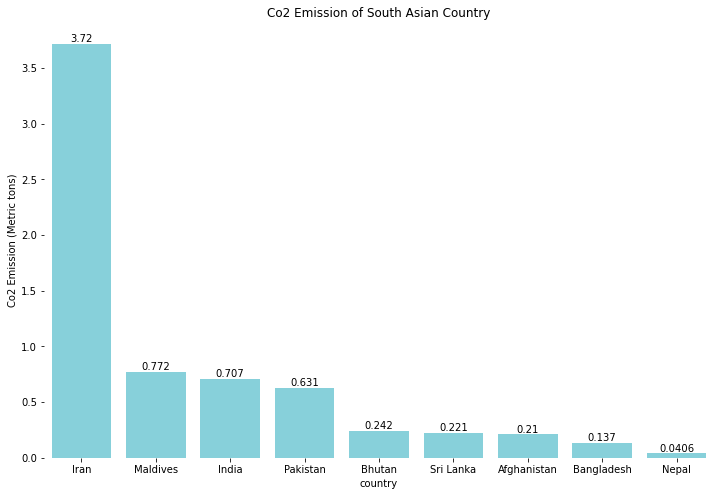

In [14]:
#Visual
barplot(df.country, df.Co2_1990, 
            order = df.sort_values('Co2_1990',ascending = False).country,
            ylabel='Co2 Emission (Metric tons)', 
            title='Co2 Emission of South Asian Country')


<a id="q2"></a>
### Country with the less fertility (Babies per woman) in 1990
+ In **Sri Lanka** in 2010, there were only **2 children/women.**
 + In Afghanistan, each woman has seven children. Indicating that **each family in Afghanistan is quite large.**

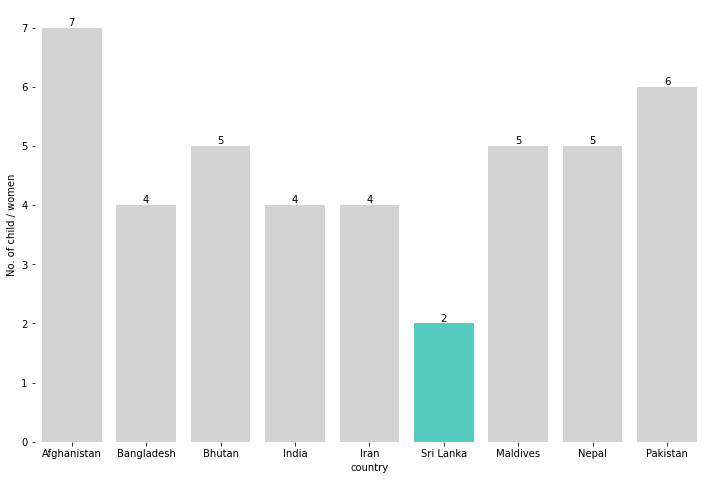

In [15]:
# Visual
barplot(df.country, df.fertility_1990, ylabel= 'No. of child / women',
        palette= set_custom_palette(df.fertility_1990, highlight= 'Min'))

<a id="q3"></a>
### Country that had the highest population growth from 1990 to 2010
**India's population has increased to 357 Million** in 2 decades, followed by neighboring country Pakistan.

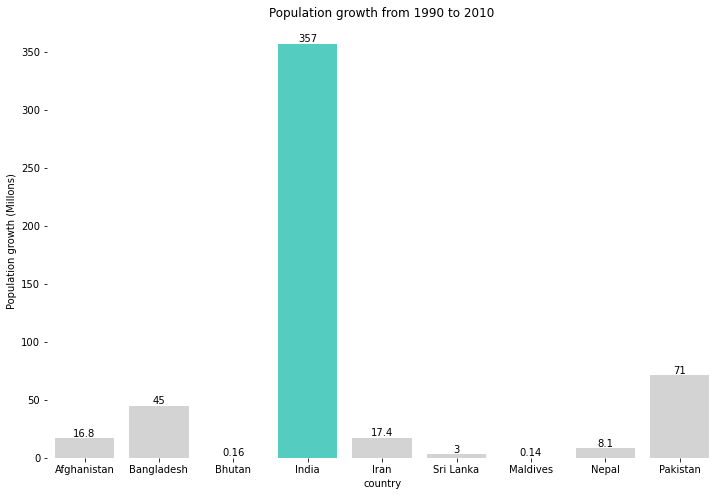

In [16]:
# Caluculating the population growth
population_growth = round((df.population_2010 - df.population_1990)/10**6,2)

#Visual
barplot(df.country, population_growth, 
            palette=set_custom_palette(population_growth, highlight= 'Max'),
            ylabel='Population growth (Millons)', 
            title='Population growth from 1990 to 2010')


<a id="q4"></a>
### Percentage of people had internet access in 2010
+ **26.5%** of people in **Maldives** have **internet access**.


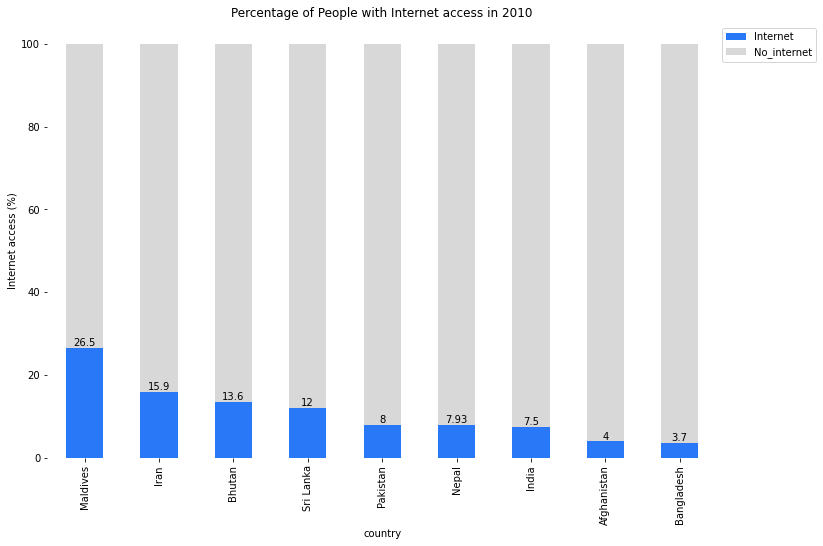

In [17]:
# Creating dateframe for plotting
plot_df = pd.DataFrame(df.country)
plot_df['Internet'] = df.internet_users_2010
plot_df['No_internet'] = df.non_internet_users_2010

# Handling Sri lanka's Incorrect data 
plot_df.iloc[5,1] = 100 - plot_df.iloc[5,2]   # Internet = 100 - No_Internet 
plot_df.sort_values('Internet', ascending = False,inplace = True)

#Visualization
ax = plot_df.set_index('country').plot(kind = 'bar', stacked = True, color = ['#2878f7','#D8D8D8'], figsize = (12,8))
sns.despine(bottom = True, left = True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.bar_label(ax.containers[0])
plt.title('Percentage of People with Internet access in 2010')
plt.ylabel('Internet access (%)')
plt.show()

<a id="q5"></a>
### Inflation trend between India & Sri Lanka between 1980 to 2022 

+ **India had better stability** in inflation than Pakistan, as we could see a nearly 14% increase in the inflation rate of Pakistan during 2005 - 2011.
+ Pakistan's inflation rate increased by 14.73% in the year 2000. It is the highest increase in the infaltion in the past 42 years.


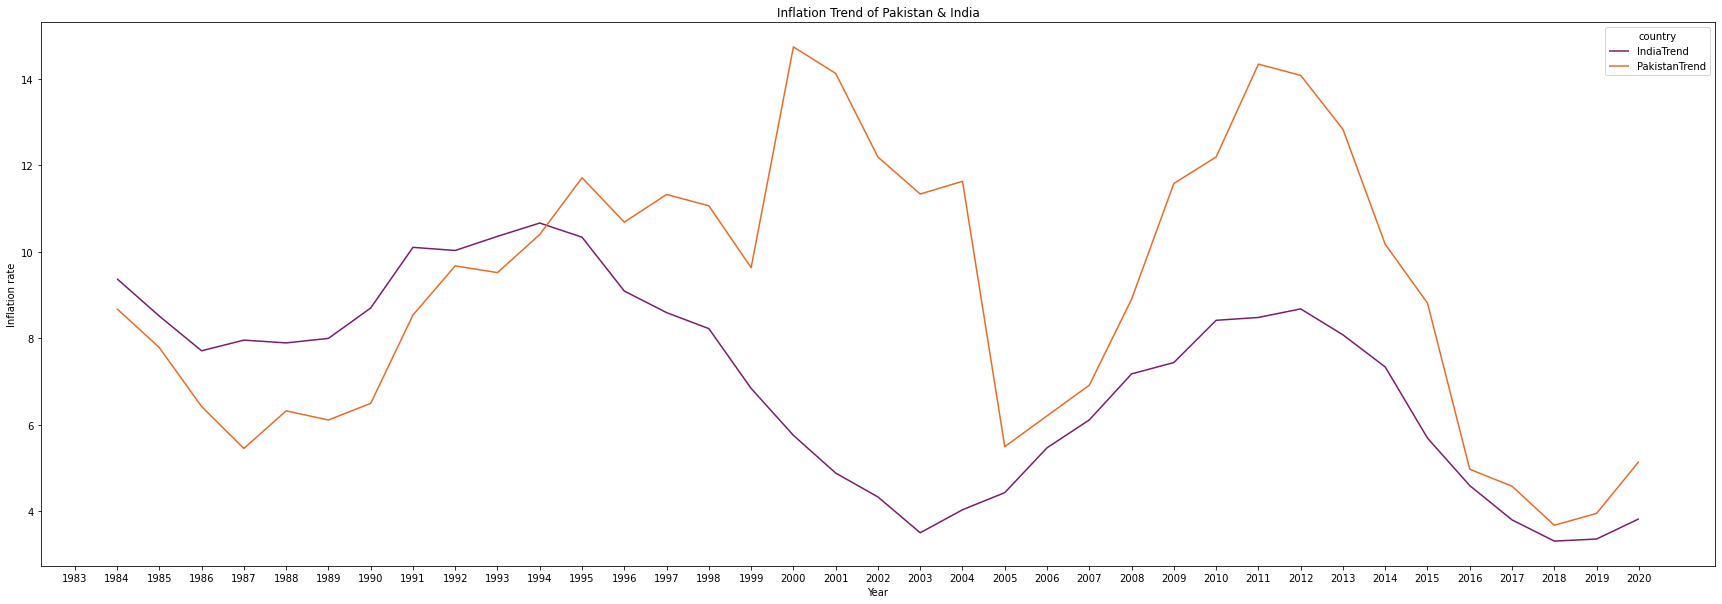

In [18]:
#Column filter
col = ['country']
for year in range(1980, 2021):
    col.append(""+str(year)+"")

#Loading the Dataset    
inflation_plot = pd.read_csv('./Data/inflation_annual_percent.csv', usecols=col)
inflation_plot = inflation_plot.query('country in ["Pakistan", "India"]')
inflation_plot.set_index('country',inplace =True)
inflation_plot_transpose = inflation_plot.transpose() #Converting the data to wide format

#Handling datatype
for c in inflation_plot_transpose.columns:
    inflation_plot_transpose[c] = inflation_plot_transpose[c].astype(float)

# Calculating trend for 5 year window
inflation_plot_transpose['IndiaTrend'] = inflation_plot_transpose['India'].rolling(5).mean()
inflation_plot_transpose['PakistanTrend'] = inflation_plot_transpose['Pakistan'].rolling(5).mean()
inflation_plot_transpose.drop(['India', 'Pakistan'], axis=1, inplace =True)

#Visualization
fig, ax = plt.subplots(figsize = (30,10))
ax = sns.lineplot(data = inflation_plot_transpose, palette = "inferno", dashes=[(1,0),(1,0)])
plt.xlabel('Year')
plt.ylabel('Inflation rate')
plt.title('Inflation Trend of Pakistan & India')
plt.show()

<a id="q6"></a>
### Income growth with respect to the inflation rate (1990 - 2010)
 + Even though **Iran** has **decreased** their **inflation rate by about 6.6 %**, the i**ncome/person has increased by $\$$5170.**
 + **Pakistan's income/person has increased only by $\$$990**. An increase in inflation and less growth in income can have **adverse effects on the living standards of the people.**


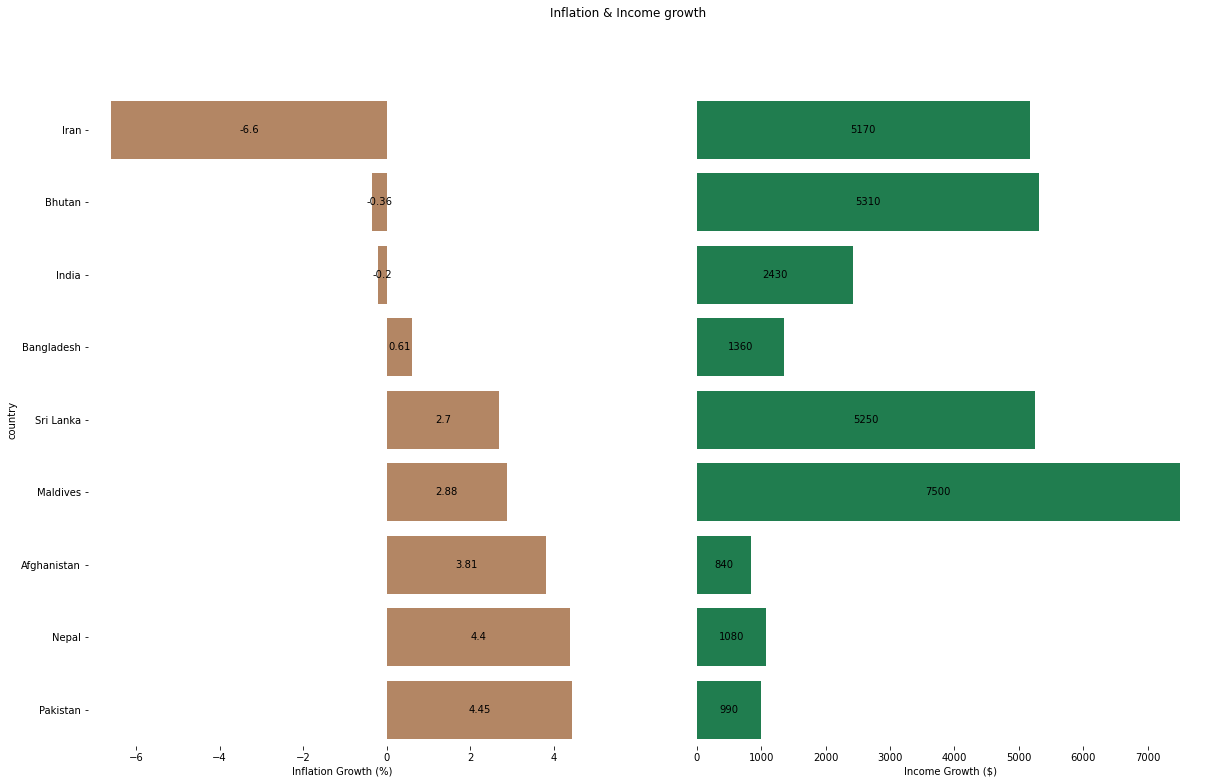

In [19]:
#Calculating field
df['inflation_growth'] = df.inflation_2010 - df.inflation_1990
df['income_growth'] = df.income_2010 - df.income_1990

# Subplots
fig, ax = plt.subplots(1,2,figsize = (20,12))
fig.suptitle('Inflation & Income growth')

# Plot 1
p1 = sns.barplot (y = df.country, x = df.inflation_growth, order = df.sort_values('inflation_growth').country, orient='h', ax = ax[0], color = '#c08457')
p1.bar_label(p1.containers[0], label_type = 'center')
p1.set_xlabel('Inflation Growth (%)')


# Plot 2
p2 = sns.barplot (y = df.country, x = df.income_growth, order = df.sort_values('inflation_growth').country, orient='h', ax = ax[1] , color = '#118C4F')
p2.set_xlabel('Income Growth ($)')
p2.bar_label(p2.containers[0], label_type= 'center')
p2.set(yticks = [])
p2.set(ylabel = '')

sns.despine(bottom = True, left = True)
plt.show()

<a id="q7"></a>
### Life expectancy over two decades (1990 - 2010)

+ **All the South Asian country have increased their life expectancy.**
+ The Maldives has increased their life span by 12 years, denoting the health and lifestyle of people have improved in 2 decades.

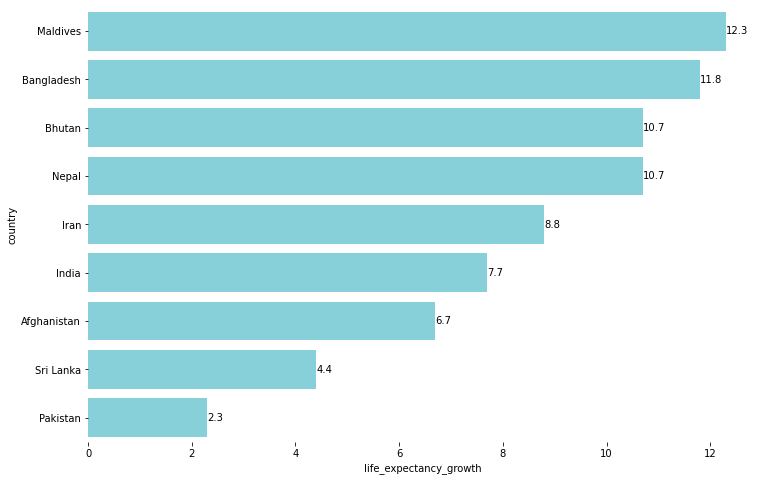

In [20]:
# Visual
df['life_expectancy_growth'] = df.life_expectancy_2010 - df.life_expectancy_1990
barplot (df.life_expectancy_growth,df.country,  orient='h',order = df.sort_values('life_expectancy_growth', ascending= False).country)

<a id="q8"></a>
### Correlation between life expectancy and morality 
+ **Life expectancy and Morality are negatively correlated.** If a country has a very good life expectancy the morality is much lesser.

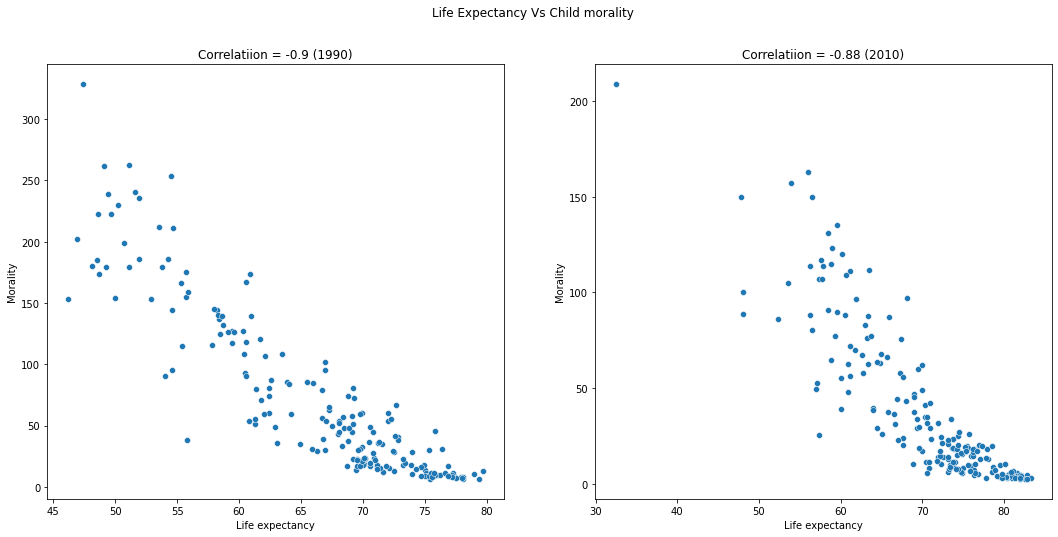

In [21]:
# Loading data for all countries
le = pd.read_csv('./Data/life_expectancy_years.csv', usecols= ['country', '1990', '2010'])
cm = pd.read_csv('./Data/child_mortality_0_5_year_olds_dying_per_1000_born.csv', usecols= ['country', '1990', '2010'])

# Merging life expectancy and morality 
correlation_df = pd.merge(le, cm, on = 'country', suffixes = ('_le', '_cm'))

# Calculating correlation
corr_1990 = round(correlation_df['1990_le'].corr(correlation_df['1990_cm']),2)
corr_2010 = round(correlation_df['2010_le'].corr(correlation_df['2010_cm']),2)


# Fixing subplots
fig, ax = plt.subplots(1,2, figsize = (18,8))
fig.suptitle('Life Expectancy Vs Child morality')

# 1990 plot
sns.scatterplot(x=correlation_df['1990_le'],y=correlation_df['1990_cm'], ax=ax[0])
ax[0].set_xlabel('Life expectancy')
ax[0].set_ylabel('Morality')
ax[0].set_title('Correlatiion = '+corr_1990.astype(str)+' (1990)')

# 2010 plot
sns.scatterplot(x=correlation_df['2010_le'],y=correlation_df['2010_cm'], ax=ax[1])
ax[1].set_xlabel('Life expectancy')
ax[1].set_ylabel('Morality')
ax[1].set_title('Correlatiion = '+corr_2010.astype(str)+' (2010)')
plt.show()

# Conclusion

**Limitation:**    
+ Even though we know the rate of inflation for the countries, we'll not be able to find the major group that caused the inflation.  
+ Since this an overview analyis on the South asian countries. we'll not be able to determine the cause for morality.   
    


**Handling missing values:**
+ For this analysis, value of the variables are mostly dependent on multiple factor. So for an overview analysis it is better to replace the NULL values to zero.  
  

**Correlation plot:**  
+ Inorder to find the correlation between Life expectancy and Morality all the countries have been included. Since filtering out specific part may lead to wrong conclusio.  

In [ ]:
!jupyter nbconvert Investigate_a_Dataset_slides.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Investigate_a_Dataset_slides.ipynb to slides
[NbConvertApp] Writing 878431 bytes to Investigate_a_Dataset_slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Investigate_a_Dataset_slides.slides.html
Use Control-C to stop this server
